In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",100)
pd.set_option('display.max_rows',100)

from pylab import mpl 
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 读取训练数据

In [2]:
df_train = pd.read_csv("df_data_train.csv", index_col = '个人编码').fillna(0)

In [6]:
df_train.shape

(20000, 371)

In [3]:
predictors = df_train.columns.difference(['target'])

In [4]:
features = pd.Series(predictors,name='feature')

# 交易行为

In [6]:
features[(features.str.startswith('first'))|(features.str.startswith('last'))]

46    first_time
48     last_time
Name: feature, dtype: object

In [8]:
first_last = [col for col in predictors[(predictors.str.startswith('first'))|(predictors.str.startswith('last'))]]

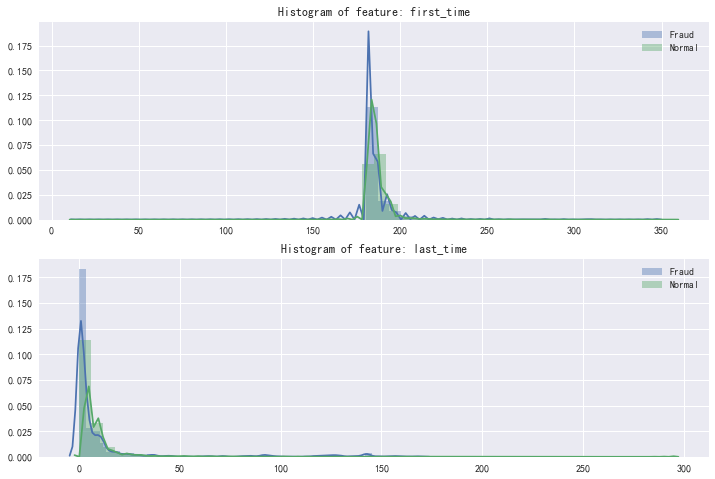

In [12]:
df = df_train
plt.figure(figsize=(12,len(first_last)*4))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(len(first_last),1)
bins = 50
for i, cn in enumerate(first_last):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.target==1], bins=bins, label='Fraud')
    sns.distplot(df[cn][df.target==0], bins=bins, label='Normal')
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: '+ cn)
    ax.legend()
plt.show()

In [49]:
print "Fraud:"
print df_train[df_train['target'] == 1]['trans_stat_max'].describe()
print ""
print "Normal:"
print df_train[df_train['target'] == 0]['trans_stat_max'].describe()

Fraud:
count    1000.000000
mean       26.270000
std        14.644028
min         4.000000
25%        15.000000
50%        23.000000
75%        35.000000
max        92.000000
Name: trans_stat_max, dtype: float64

Normal:
count    19000.000000
mean        21.957579
std         12.398993
min          2.000000
25%         13.000000
50%         21.000000
75%         28.000000
max        281.000000
Name: trans_stat_max, dtype: float64


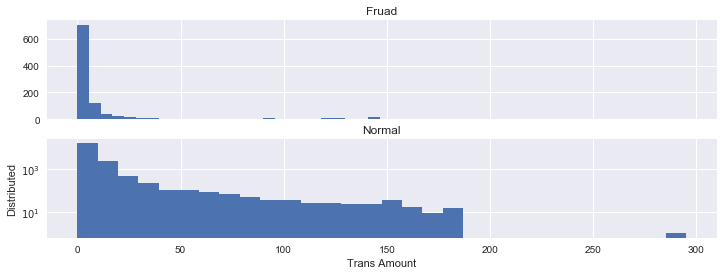

In [82]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(12,4))
bins=30
ax1.hist(df_train.last_time[df_train.target==1],bins=bins)
ax1.set_title("Fruad")

ax2.hist(df_train.last_time[df_train.target==0],bins=bins)
ax2.set_title("Normal")

plt.xlabel("Trans Amount")
plt.ylabel("Distributed")
plt.yscale('log')
plt.show()

In [86]:
trans_features = df[[col for col in predictors[predictors.str.startswith("trans_")]]]

In [88]:
len(trans_features.columns)

8

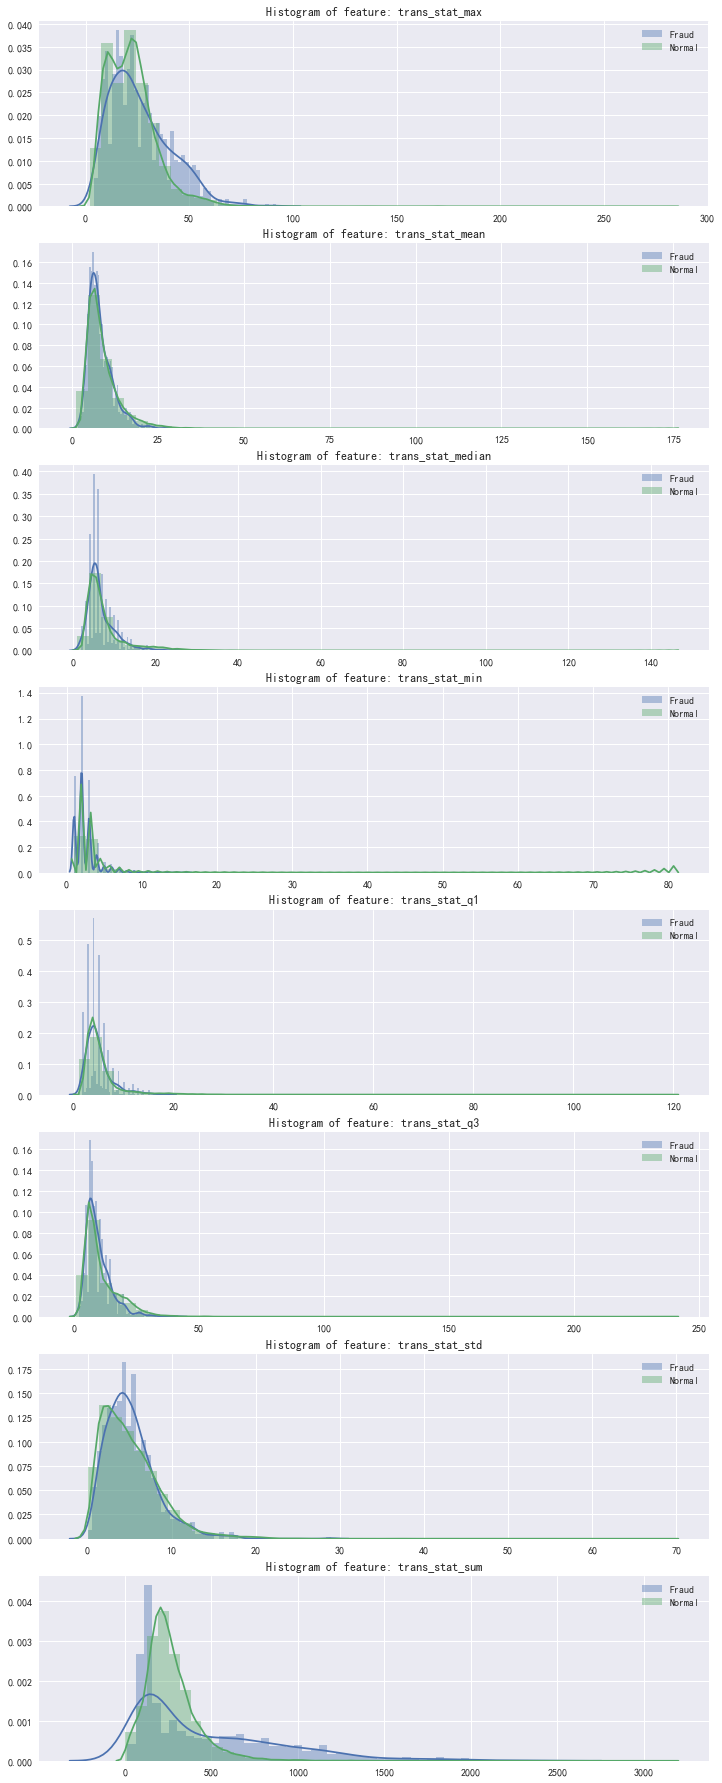

In [99]:
trans_features = df[[col for col in predictors[predictors.str.startswith("trans_")]]]
plt.figure(figsize=(12,len(trans_features.columns)*4))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(len(trans_features.columns),1)
bins = 50
for i, cn in enumerate(trans_features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.target==1], bins=bins, label='Fraud')
    sns.distplot(df[cn][df.target==0], bins=bins, label='Normal')
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: '+ cn)
    ax.legend()
plt.show()

# 药品金额
- 空值，或常数

In [4]:
df[['药品费发生金额','药品费申报金额','贵重药品发生金额','中成药费发生金额','中草药费发生金额','药品费自费金额']].describe()

,药品费发生金额,药品费申报金额,贵重药品发生金额,中成药费发生金额,中草药费发生金额,药品费自费金额
count,5.449121e+06,5.449121e+06,5.449121e+06,5.449121e+06,5.449121e+06,5.449121e+06
mean,3.036037e+02,3.001944e+02,3.189874e+01,4.247658e+01,1.262689e+02,1.337126e+00
std,3.769216e+02,3.676920e+02,1.937501e+02,1.266808e+02,2.486104e+02,3.337286e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.508100e+02,2.484500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.584400e+02,4.513500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.253500e+04,3.253500e+04,3.253500e+04,5.848000e+03,2.800000e+03,7.752080e+03


In [63]:
df = df_train.reset_index()

In [57]:
features[features.str.startswith('药品费发生金额')]

286     药品费发生金额_max
287    药品费发生金额_mean
288      药品费发生金额_q1
289      药品费发生金额_q2
290      药品费发生金额_q3
291     药品费发生金额_std
292     药品费发生金额_sum
Name: feature, dtype: object

In [67]:
df['药品费发生金额_max'][df.target==1].values

array([  780.63,   666.36,   941.93,  1488.06,   601.86,   507.57,
        1979.59,   842.63,  1426.8 ,   686.98,  1806.06,   999.12,
        1158.45,   669.39,   769.3 ,   620.76,  1019.71,   375.11,
         497.28,   745.44,   814.25,   367.5 ,   891.12,   505.29,
        1986.11,   528.99,  1721.3 ,   839.04,   814.25,   976.58,
         887.53,   693.84,   835.1 ,   568.07,   872.26,   807.68,
         837.62,   881.08,   434.58,  1114.37,   771.87,   500.7 ,
         464.39,   791.08,   740.1 ,   759.5 ,   546.08,   749.05,
        1115.23,   652.26,  1033.6 ,  1078.6 ,   694.4 ,   716.05,
         700.  ,   646.92,  2775.57,   941.25,   498.45,  1132.98,
         776.15,   680.54,  1261.08,   422.12,   761.97,   515.22,
        1006.04,  2964.23,  1128.19,  2090.99,  1060.86,   503.24,
         744.35,   396.51,   738.53,   975.56,   758.24,   518.93,
        1294.86,  1082.16,   709.79,   908.96,   908.96,   782.22,
         666.81,   601.3 ,   971.04,   821.4 ,   837.29,  1054

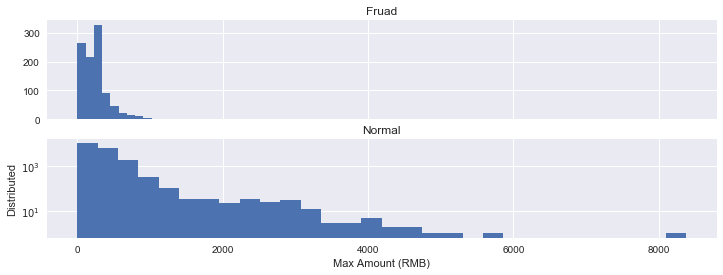

In [78]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(12,4))
bins=30
ax1.hist(df['药品费发生金额_q2'][df.target==1].values,bins=bins)
ax1.set_title("Fruad")

ax2.hist(df['药品费发生金额_q2'][df.target==0].values,bins=bins)
ax2.set_title("Normal")

plt.xlabel("Max Amount (RMB)")
plt.ylabel("Distributed")
plt.yscale('log')
plt.show()

In [103]:
trans_features

,药品费发生金额_max,药品费发生金额_mean,药品费发生金额_q1,药品费发生金额_q2,药品费发生金额_q3,药品费发生金额_std,药品费发生金额_sum
0,1155.84,346.661330,0.000,413.66,569.7200,255.602647,70372.25
1,748.69,261.100462,0.000,274.23,431.4700,223.864393,33943.06
2,880.60,220.459474,0.000,175.28,351.3600,226.204349,50264.76
3,687.82,167.438318,0.000,0.00,406.1500,205.794133,17915.90
4,497.23,265.764615,0.000,293.78,449.0400,202.012946,41459.28
5,652.16,210.917216,0.000,61.95,350.0000,244.900668,61376.91
6,627.04,176.281239,0.000,148.64,339.4800,193.262699,38429.31
7,699.72,335.730583,0.000,307.28,603.5400,265.412622,190023.51
8,647.77,335.907595,160.645,419.86,420.0000,202.221450,124285.81
9,737.03,297.158380,156.410,315.00,454.4400,217.673060,115594.61


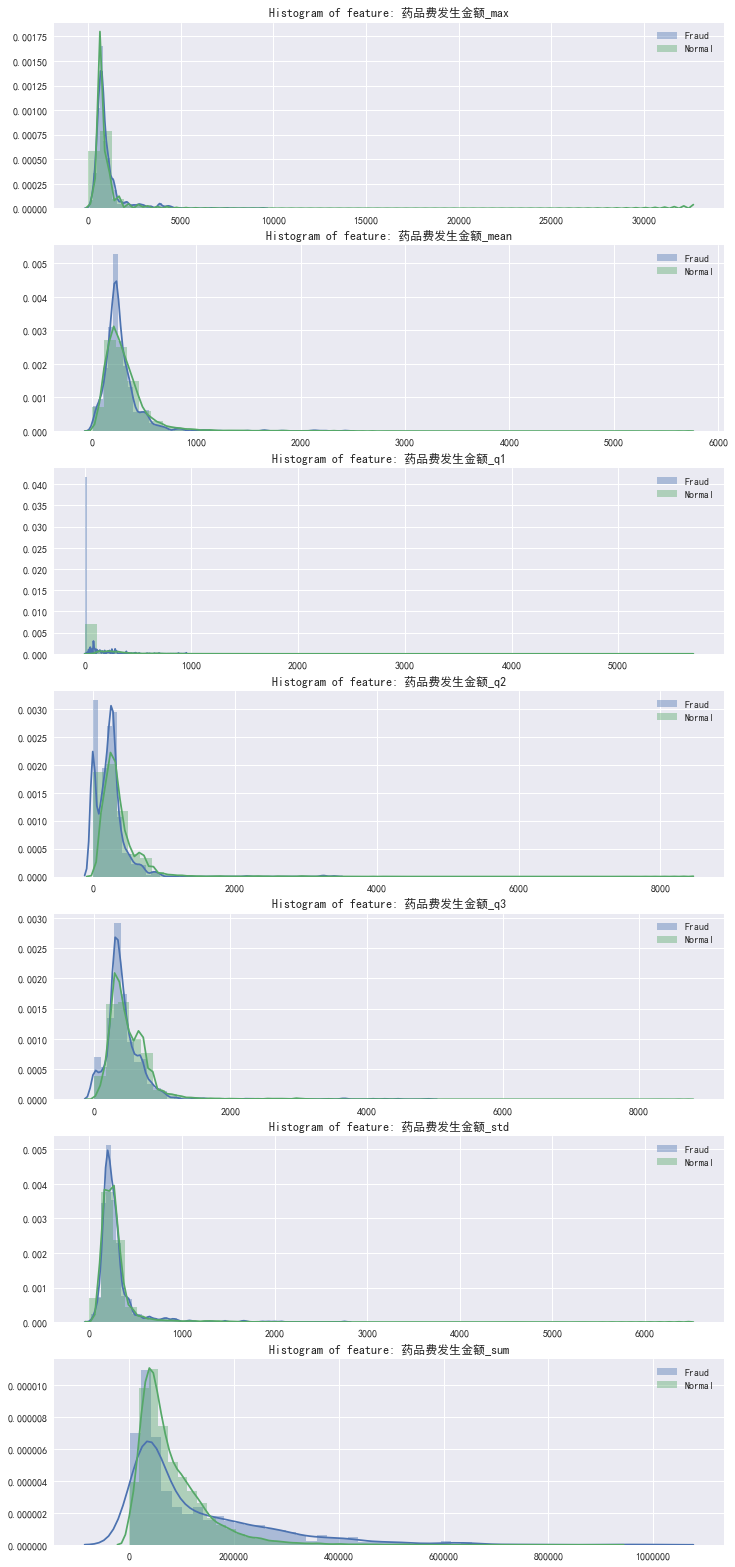

In [114]:
trans_features = [col for col in predictors[predictors.str.startswith("药品费发生金额")]]
plt.figure(figsize=(12,len(trans_features)*4))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(len(trans_features),1)
bins = 50
for i, cn in enumerate(trans_features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.target==1].values, bins=bins, label='Fraud')
    sns.distplot(df[cn][df.target==0].values, bins=bins, label='Normal')
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: '+ cn.decode('utf-8'))
    ax.legend()
plt.show()

In [5]:
df[['药品费发生金额','药品费申报金额','贵重药品发生金额','中成药费发生金额','中草药费发生金额','药品费自费金额']].isnull().sum()

药品费发生金额     0
药品费申报金额     0
贵重药品发生金额    0
中成药费发生金额    0
中草药费发生金额    0
药品费自费金额     0
dtype: int64

In [9]:
df[['药品费发生金额','药品费申报金额','贵重药品发生金额','中成药费发生金额','中草药费发生金额','药品费自费金额']].std()

药品费发生金额     376.921582
药品费申报金额     367.691956
贵重药品发生金额    193.750057
中成药费发生金额    126.680849
中草药费发生金额    248.610374
药品费自费金额      33.372856
dtype: float64

In [6]:
df['药品费发生金额'] == df['药品费申报金额']+df['药品费自费金额']

顺序号
MT00021607015838544     True
MT00021607015838544     True
MT00021607015846496     True
MT00021607015846496     True
MT00021607015847311     True
MT00021607015847311     True
MT00021607015848868     True
MT00021607015848868     True
MT00021607015848868     True
MT00021607015849875     True
MT00021607015851232     True
MT00021607015851232     True
MT00021607015852182     True
MT00021607015852182     True
MT00021607015855535     True
MT00021607015875599     True
MT00021607015875599     True
MT00021607015878942     True
MT00021607015893145     True
MT00021607015893145     True
MT00021607015896185     True
MT00021607015896185     True
MT00021607015896185     True
MT00021607015896185     True
MT00021607015896185     True
MT00021607015896185     True
MT00021607015896185     True
MT00021607015896185     True
MT00021607015896185     True
MT00021607015896185     True
MT00021607015896185     True
MT00021607015896185     True
MT00021607015896185     True
MT00021607015896185     True
MT00021607

# 检查费用

**检查费拒付金额** 方差为零

In [6]:
df[['检查费发生金额','贵重检查费金额','检查费自费金额','检查费拒付金额','检查费申报金额']].isnull().sum()

检查费发生金额    0
贵重检查费金额    0
检查费自费金额    0
检查费拒付金额    0
检查费申报金额    0
dtype: int64

In [10]:
df[['检查费发生金额','贵重检查费金额','检查费自费金额','检查费拒付金额','检查费申报金额']].std()

检查费发生金额    110.553112
贵重检查费金额     49.788154
检查费自费金额     11.944954
检查费拒付金额      0.000000
检查费申报金额    102.794534
dtype: float64

['治疗费发生金额', '治疗费自费金额','治疗费拒付金额','治疗费申报金额','手术费发生金额','手术费自费金额','手术费拒付金额','手术费申报金额','床位费发生金额','床位费拒付金额','床位费申报金额','医用材料发生金额','高价材料发生金额','医用材料费自费金额','医用材料费拒付金额','输全血申报金额','成分输血自费金额','成分输血拒付金额','成分输血申报金额','其它发生金额','其它拒付金额','其它申报金额','一次性医用材料自费金额','一次性医用材料拒付金额','一次性医用材料申报金额']

In [4]:
df[['治疗费发生金额', '治疗费自费金额','治疗费拒付金额','治疗费申报金额','手术费发生金额','手术费自费金额','手术费拒付金额','手术费申报金额','床位费发生金额','床位费拒付金额','床位费申报金额','医用材料发生金额','高价材料发生金额','医用材料费自费金额','医用材料费拒付金额','输全血申报金额','成分输血自费金额','成分输血拒付金额','成分输血申报金额','其它发生金额','其它拒付金额','其它申报金额','一次性医用材料自费金额','一次性医用材料拒付金额','一次性医用材料申报金额']].std()

治疗费发生金额        221.667672
治疗费自费金额         14.000509
治疗费拒付金额          0.000000
治疗费申报金额        215.518872
手术费发生金额         15.869921
手术费自费金额          1.281320
手术费拒付金额          0.000000
手术费申报金额         15.811856
床位费发生金额          3.069428
床位费拒付金额          0.000000
床位费申报金额          3.065071
医用材料发生金额        39.126951
高价材料发生金额        44.135183
医用材料费自费金额        9.471671
医用材料费拒付金额        0.000000
输全血申报金额          0.000000
成分输血自费金额         0.000000
成分输血拒付金额         0.000000
成分输血申报金额        18.227189
其它发生金额           2.070544
其它拒付金额           0.000000
其它申报金额           0.256554
一次性医用材料自费金额      0.000000
一次性医用材料拒付金额           NaN
一次性医用材料申报金额     62.025575
dtype: float64

# 其他

['起付线标准金额','起付标准以上自负比例金额','医疗救助个人按比例负担金额','最高限额以上金额','统筹拒付金额','基本医疗保险统筹基金支付金额','农民工医疗救助计算金额','公务员医疗补助基金支付金额','城乡救助补助金额','可用账户报销金额','基本医疗保险个人账户支付金额','非账户支付金额','双笔退费标识','住院天数','出院诊断病种名称','本次审批金额','补助审批金额','医疗救助医院申请','残疾军人医疗补助基金支付金额','民政救助补助金额','城乡优抚补助金额','非典补助补助金额','家床起付线剩余']

In [6]:
df[['起付线标准金额','起付标准以上自负比例金额','医疗救助个人按比例负担金额','最高限额以上金额']].isnull().sum()

起付线标准金额          0
起付标准以上自负比例金额     0
医疗救助个人按比例负担金额    0
最高限额以上金额         0
dtype: int64

'可用账户报销金额','基本医疗保险个人账户支付金额','非账户支付金额','双笔退费标识','住院天数','出院诊断病种名称','本次审批金额','补助审批金额','医疗救助医院申请','残疾军人医疗补助基金支付金额','民政救助补助金额','城乡优抚补助金额','非典补助补助金额','家床起付线剩余'

In [9]:
df[['统筹拒付金额','基本医疗保险统筹基金支付金额','农民工医疗救助计算金额','公务员医疗补助基金支付金额','城乡救助补助金额']].isnull().sum()/len(df)

统筹拒付金额            0.000000
基本医疗保险统筹基金支付金额    0.000000
农民工医疗救助计算金额       1.000000
公务员医疗补助基金支付金额     0.977108
城乡救助补助金额          0.832075
dtype: float64

In [8]:
df[['统筹拒付金额','基本医疗保险统筹基金支付金额','农民工医疗救助计算金额','公务员医疗补助基金支付金额','城乡救助补助金额']].std()

统筹拒付金额              0.000000
基本医疗保险统筹基金支付金额    367.911880
农民工医疗救助计算金额              NaN
公务员医疗补助基金支付金额      74.451312
城乡救助补助金额           63.644968
dtype: float64

In [11]:
df[['可用账户报销金额','基本医疗保险个人账户支付金额','非账户支付金额','双笔退费标识','住院天数','出院诊断病种名称','本次审批金额','补助审批金额','医疗救助医院申请','残疾军人医疗补助基金支付金额','民政救助补助金额','城乡优抚补助金额','非典补助补助金额','家床起付线剩余']].isnull().sum()/len(df)

可用账户报销金额          0.000000
基本医疗保险个人账户支付金额    0.000000
非账户支付金额           0.000000
双笔退费标识            0.000000
住院天数              0.000000
出院诊断病种名称          0.845694
本次审批金额            0.000872
补助审批金额            0.832301
医疗救助医院申请          0.000872
残疾军人医疗补助基金支付金额    0.999660
民政救助补助金额          0.000874
城乡优抚补助金额          0.000872
非典补助补助金额          0.000872
家床起付线剩余           0.845487
dtype: float64

In [3]:
df[['可用账户报销金额','基本医疗保险个人账户支付金额','非账户支付金额','双笔退费标识','住院天数']].std()

可用账户报销金额          73.530257
基本医疗保险个人账户支付金额    12.389355
非账户支付金额           85.273412
双笔退费标识             0.000000
住院天数               0.000000
dtype: float64

In [4]:
df[['本次审批金额','补助审批金额','医疗救助医院申请','残疾军人医疗补助基金支付金额','民政救助补助金额','城乡优抚补助金额','非典补助补助金额','家床起付线剩余']].std()

本次审批金额            436.763294
补助审批金额             90.781709
医疗救助医院申请           82.817552
残疾军人医疗补助基金支付金额    265.606675
民政救助补助金额           30.074370
城乡优抚补助金额            1.224313
非典补助补助金额            0.000000
家床起付线剩余             0.000000
dtype: float64

In [5]:
df['出院诊断病种名称']

顺序号
MT00021607015838544                挂号
MT00021607015838544                挂号
MT00021607015846496                挂号
MT00021607015846496                挂号
MT00021607015847311         糖尿病性冠心病  
MT00021607015847311         糖尿病性冠心病  
MT00021607015848868             糖尿病  
MT00021607015848868             糖尿病  
MT00021607015848868             糖尿病  
MT00021607015849875         糖尿病性冠心病  
MT00021607015851232                挂号
MT00021607015851232                挂号
MT00021607015852182             :偏瘫  
MT00021607015852182             :偏瘫  
MT00021607015855535             :偏瘫  
MT00021607015875599                挂号
MT00021607015875599                挂号
MT00021607015878942        脑梗塞后遗症 偏瘫 
MT00021607015893145                挂号
MT00021607015893145                挂号
MT00021607015896185     ;糖尿病 血虚 下焦寒凉 
MT00021607015896185     ;糖尿病 血虚 下焦寒凉 
MT00021607015896185     ;糖尿病 血虚 下焦寒凉 
MT00021607015896185     ;糖尿病 血虚 下焦寒凉 
MT00021607015896185     ;糖尿病 血虚 下焦寒凉 
MT00021607015896185     ;糖尿病 血虚 下焦寒凉 
MT000216

In [7]:
df[['三目统计项目','剂型','单价','拒付原因','拒付原因编码','数量','规格']].isnull().sum()/len(df)

三目统计项目    0.000001
剂型        0.000001
单价        0.000001
拒付原因      0.999988
拒付原因编码    0.999988
数量        0.000001
规格        0.000001
dtype: float64

# 小结

**数据检视内容**
- 数据类型
- 数据缺失
- 数值类型统计分析（方差为0的可以去除）
- 标称类型统计分析（value_counts)

***NOTE:***  可以设计通用处理类来检视数据！！  

**本问题总结**  
## 缺失率高属性

In [14]:
df[['一次性医用材料拒付金额','农民工医疗救助计算金额','拒付原因','拒付原因编码']].head()

,一次性医用材料拒付金额,农民工医疗救助计算金额,拒付原因,拒付原因编码
顺序号,,,,
MT00021607015838544,NaN,NaN,NaN,NaN
MT00021607015838544,NaN,NaN,NaN,NaN
MT00021607015846496,NaN,NaN,NaN,NaN
MT00021607015846496,NaN,NaN,NaN,NaN
MT00021607015847311,NaN,NaN,NaN,NaN


## 方差为零属性

In [12]:
df[['检查费拒付金额','治疗费拒付金额','手术费拒付金额',\
    '床位费拒付金额','医用材料费拒付金额','输全血申报金额','成分输血自费金额',\
    '成分输血拒付金额','其它拒付金额','一次性医用材料自费金额',\
   '统筹拒付金额','双笔退费标识','住院天数','非典补助补助金额','家床起付线剩余']].std()

检查费拒付金额        0.0
治疗费拒付金额        0.0
手术费拒付金额        0.0
床位费拒付金额        0.0
医用材料费拒付金额      0.0
输全血申报金额        0.0
成分输血自费金额       0.0
成分输血拒付金额       0.0
其它拒付金额         0.0
一次性医用材料自费金额    0.0
统筹拒付金额         0.0
双笔退费标识         0.0
住院天数           0.0
非典补助补助金额       0.0
家床起付线剩余        0.0
dtype: float64

## 其他丢弃属性

In [18]:
df[['出院诊断病种名称','剂型','单价','数量','规格','三目医院服务项目名称','三目服务项目名称']].head()

KeyError: "[ '\\xe5\\x87\\xba\\xe9\\x99\\xa2\\xe8\\xaf\\x8a\\xe6\\x96\\xad\\xe7\\x97\\x85\\xe7\\xa7\\x8d\\xe5\\x90\\x8d\\xe7\\xa7\\xb0'\n '\\xe5\\x89\\x82\\xe5\\x9e\\x8b' '\\xe5\\x8d\\x95\\xe4\\xbb\\xb7'\n '\\xe6\\x95\\xb0\\xe9\\x87\\x8f' '\\xe8\\xa7\\x84\\xe6\\xa0\\xbc'] not in index"

# 整理数据集保留有效属性

In [15]:
df.drop(['一次性医用材料拒付金额','农民工医疗救助计算金额','拒付原因','拒付原因编码',\
        '检查费拒付金额','治疗费拒付金额','手术费拒付金额',\
    '床位费拒付金额','医用材料费拒付金额','输全血申报金额','成分输血自费金额',\
    '成分输血拒付金额','其它拒付金额','一次性医用材料自费金额',\
   '统筹拒付金额','双笔退费标识','住院天数','非典补助补助金额','家床起付线剩余',\
        '出院诊断病种名称','剂型','单价','数量','规格',\
        '三目医院服务项目名称','三目服务项目名称'],axis=1,inplace=True)

In [19]:
df.drop(['三目医院服务项目名称','三目服务项目名称'],axis=1,inplace=True)

In [20]:
df.head()

,个人编码,医院编码,药品费发生金额,贵重药品发生金额,中成药费发生金额,中草药费发生金额,药品费自费金额,药品费拒付金额,药品费申报金额,检查费发生金额,贵重检查费金额,检查费自费金额,检查费申报金额,治疗费发生金额,治疗费自费金额,治疗费申报金额,手术费发生金额,手术费自费金额,手术费申报金额,床位费发生金额,床位费申报金额,医用材料发生金额,高价材料发生金额,医用材料费自费金额,成分输血申报金额,其它发生金额,其它申报金额,一次性医用材料申报金额,输全血按比例自负金额,起付线标准金额,起付标准以上自负比例金额,医疗救助个人按比例负担金额,最高限额以上金额,基本医疗保险统筹基金支付金额,交易时间,公务员医疗补助基金支付金额,城乡救助补助金额,可用账户报销金额,基本医疗保险个人账户支付金额,非账户支付金额,本次审批金额,补助审批金额,医疗救助医院申请,残疾军人医疗补助基金支付金额,民政救助补助金额,城乡优抚补助金额,三目统计项目
顺序号,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MT00021607015838544,352120002117339,2,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.30,0.0,0.0,2.70,2016-07-01,NaN,NaN,0.30,0.30,0.6,3.00,NaN,0.0,NaN,0.0,0.0,7.0
MT00021607015838544,352120002117339,2,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.30,0.0,0.0,2.70,2016-07-01,NaN,NaN,0.30,0.30,0.6,3.00,NaN,0.0,NaN,0.0,0.0,3.0
MT00021607015846496,352120002127172,2,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.30,0.0,0.0,2.70,2016-07-01,NaN,NaN,0.30,0.00,0.9,3.00,NaN,0.0,NaN,0.0,0.0,7.0
MT00021607015846496,352120002127172,2,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.30,0.0,0.0,2.70,2016-07-01,NaN,NaN,0.30,0.00,0.9,3.00,NaN,0.0,NaN,0.0,0.0,3.0
MT00021607015847311,352120002117339,2,61.92,0.0,0.0,0.0,0.0,0.0,61.92,30.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.19,0.0,0.0,82.73,2016-07-01,NaN,NaN,9.19,9.19,0.0,91.92,NaN,0.0,NaN,0.0,0.0,2.0


In [22]:
df.fillna(0,inplace=True)

In [26]:
df.to_hdf("df_train_clean.h5", key = "df_train_clean", complib = "zlib", complevel = 1, mode = "w")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5449121 entries, MT00021607015838544 to MT16911612298183475
Data columns (total 47 columns):
个人编码              int64
医院编码              int64
药品费发生金额           float64
贵重药品发生金额          float64
中成药费发生金额          float64
中草药费发生金额          float64
药品费自费金额           float64
药品费拒付金额           float64
药品费申报金额           float64
检查费发生金额           float64
贵重检查费金额           float64
检查费自费金额           float64
检查费申报金额           float64
治疗费发生金额           float64
治疗费自费金额           float64
治疗费申报金额           float64
手术费发生金额           float64
手术费自费金额           float64
手术费申报金额           float64
床位费发生金额           float64
床位费申报金额           float64
医用材料发生金额          float64
高价材料发生金额          float64
医用材料费自费金额         float64
成分输血申报金额          float64
其它发生金额            float64
其它申报金额            float64
一次性医用材料申报金额       float64
输全血按比例自负金额        float64
起付线标准金额           float64
起付标准以上自负比例金额      float64
医疗救助个人按比例负担金额     float64
最高限额以上金额          float64
基本医疗保险统筹

# 所有特征分布特征

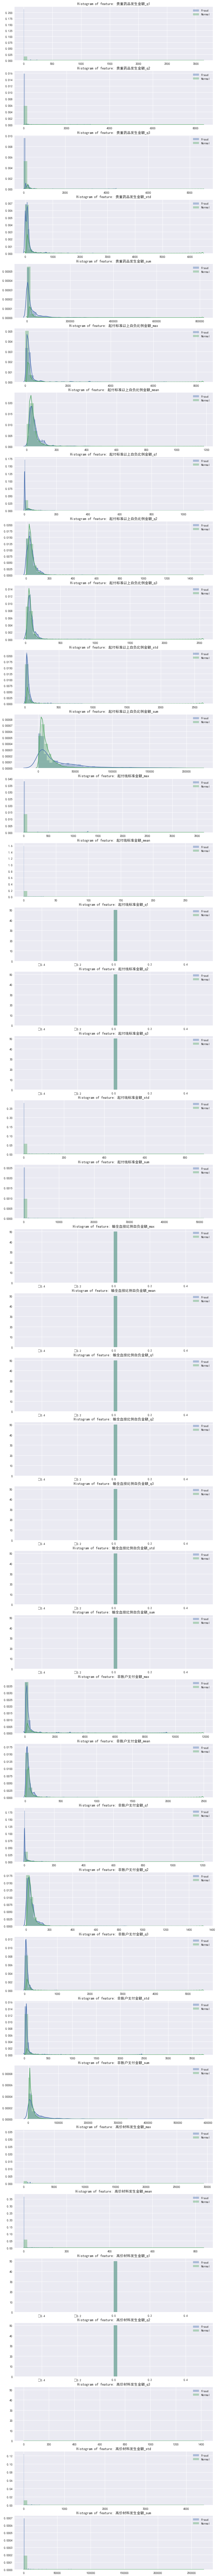

In [125]:
plt.figure(figsize=(12,len(predictors)/2*4))
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(len(predictors)/2,1)
bins = 50
for i, cn in enumerate(predictors[330:]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.target==1].values, bins=bins, label='Fraud')
    sns.distplot(df[cn][df.target==0].values, bins=bins, label='Normal')
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: '+ cn.decode('utf-8'))
    ax.legend()
plt.show()

# 总结分析

**有很多特征为0或为常数，需要删除！**

In [130]:
feature_std = df[predictors].std()

In [136]:
feature_std[feature_std == 0]

其它申报金额_q1          0.0
其它申报金额_q2          0.0
其它申报金额_q3          0.0
手术费自费金额_q1         0.0
手术费自费金额_q2         0.0
手术费自费金额_q3         0.0
最高限额以上金额_q1        0.0
最高限额以上金额_q2        0.0
最高限额以上金额_q3        0.0
药品费拒付金额_max        0.0
药品费拒付金额_mean       0.0
药品费拒付金额_q1         0.0
药品费拒付金额_q2         0.0
药品费拒付金额_q3         0.0
药品费拒付金额_std        0.0
药品费拒付金额_sum        0.0
起付线标准金额_q1         0.0
起付线标准金额_q2         0.0
起付线标准金额_q3         0.0
输全血按比例自负金额_max     0.0
输全血按比例自负金额_mean    0.0
输全血按比例自负金额_q1      0.0
输全血按比例自负金额_q2      0.0
输全血按比例自负金额_q3      0.0
输全血按比例自负金额_std     0.0
输全血按比例自负金额_sum     0.0
高价材料发生金额_q1        0.0
高价材料发生金额_q2        0.0
dtype: float64